Importing libraries and data

In [12]:
#Importing libraries

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
import pylab as pl
from sklearn.preprocessing import StandardScaler

In [2]:
#Ensuring graphs created are displayed in notebook without need to call specifically

%matplotlib inline

In [3]:
#Setting path

path = r"C:\Users\luiss\OneDrive\Career Foundry\Achievement 6 - Life Expectancy"

In [4]:
#Importing Life Expectancy data

lf = pd.read_csv(os.path.join(path, 'Data', 'LifeExpectancyClean.csv'))

In [5]:
#Checking data

lf.shape

(2864, 24)

In [6]:
lf.head()

,Unnamed: 0,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,...,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy,LifeExp Category,Economy
0,0,Turkey,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,...,11006,78.53,4.9,4.8,7.8,0,1,76.5,High,Developing
1,1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,...,25742,46.44,0.6,0.5,9.7,1,0,82.8,High,Developed
2,2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,...,1076,1183.21,27.1,28.0,5.0,0,1,65.4,Middle,Developing
3,3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,...,4146,0.75,5.7,5.5,7.9,0,1,67.0,Middle,Developing
4,4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,...,33995,7.91,1.2,1.1,12.8,1,0,81.7,High,Developed


In [8]:
lf.columns

Index(['Unnamed: 0', 'Country', 'Region', 'Year', 'Infant_deaths',
       'Under_five_deaths', 'Adult_mortality', 'Alcohol_consumption',
       'Hepatitis_B', 'Measles', 'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV',
       'GDP_per_capita', 'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
       'Economy_status_Developing', 'Life_expectancy', 'LifeExp Category',
       'Economy'],
      dtype='object')

In [10]:
#Creating subset of columns for k-means algorithm

lfk = lf[['Infant_deaths', 'Under_five_deaths', 'Adult_mortality', 'Alcohol_consumption',
       'Hepatitis_B', 'Measles', 'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV',
       'GDP_per_capita', 'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Life_expectancy']]

In [11]:
lfk.head()

,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Life_expectancy
0,11.1,13.0,105.8240,1.32,97,65,27.8,97,97,0.08,11006,78.53,4.9,4.8,7.8,76.5
1,2.7,3.3,57.9025,10.35,97,94,26.0,97,97,0.09,25742,46.44,0.6,0.5,9.7,82.8
2,51.5,67.9,201.0765,1.57,60,35,21.2,67,64,0.13,1076,1183.21,27.1,28.0,5.0,65.4
3,32.8,40.5,222.1965,5.68,93,74,25.3,92,93,0.79,4146,0.75,5.7,5.5,7.9,67.0
4,3.4,4.3,57.9510,2.89,97,89,27.0,94,94,0.08,33995,7.91,1.2,1.1,12.8,81.7


Standardizing Data

In [17]:
#Defining standard scalar

scaler = StandardScaler()

In [18]:
#Transforming Data

lfk = scaler.fit_transform(lfk)

In [19]:
lfk

array([[-0.69965409, -0.67183114, -0.752264  , ..., -0.02206366,
         0.05294134,  0.81284054],
       [-1.00473911, -0.88950446, -1.16937088, ..., -0.97246033,
         0.65212105,  1.48277067],
       [ 0.76765958,  0.56015494,  0.07681006, ...,  5.10565789,
        -0.83006034, -0.36751255],
       ...,
       [-0.45994443, -0.31502643, -0.49923115, ...,  2.34287688,
         0.8413357 ,  0.57889668],
       [-0.81587695, -0.74139684,  0.10236054, ..., -0.35359738,
         1.09362189,  0.31305139],
       [-1.0265309 , -0.90521284, -1.2331535 , ..., -0.88405134,
         1.06208612,  1.44023542]])

Using Elbow Technique

In [35]:
#Defining range of potential clusters
num_cl = range(1, 20)

#Defining k-means clustesr in range assigned above
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [36]:
#Creating score that represents rate of variation for given cluster option

score = [kmeans[i].fit(lfk).score(lfk) for i in range(len(kmeans))]

score

[-45824.000000000015,
 -27954.65787140365,
 -25033.165902153585,
 -22301.512115547856,
 -20361.41113686136,
 -17697.00752174473,
 -15364.856256386825,
 -14484.068310405868,
 -13168.944467949168,
 -12564.061730500807,
 -12378.676437218819,
 -11515.222230644918,
 -11272.803644548057,
 -11034.369257333205,
 -10582.069667648211,
 -10196.19609554512,
 -10161.627324165516,
 -9712.55128028104,
 -9394.959598935933]

In [37]:
#Troubleshooting

import psutil
print(psutil.cpu_count(logical=False))

6


In [38]:
os.environ["LOKY_MAX_CPU_COUNT"] = "6"

In [39]:
#Rechecking score

score

[-45824.000000000015,
 -27954.65787140365,
 -25033.165902153585,
 -22301.512115547856,
 -20361.41113686136,
 -17697.00752174473,
 -15364.856256386825,
 -14484.068310405868,
 -13168.944467949168,
 -12564.061730500807,
 -12378.676437218819,
 -11515.222230644918,
 -11272.803644548057,
 -11034.369257333205,
 -10582.069667648211,
 -10196.19609554512,
 -10161.627324165516,
 -9712.55128028104,
 -9394.959598935933]

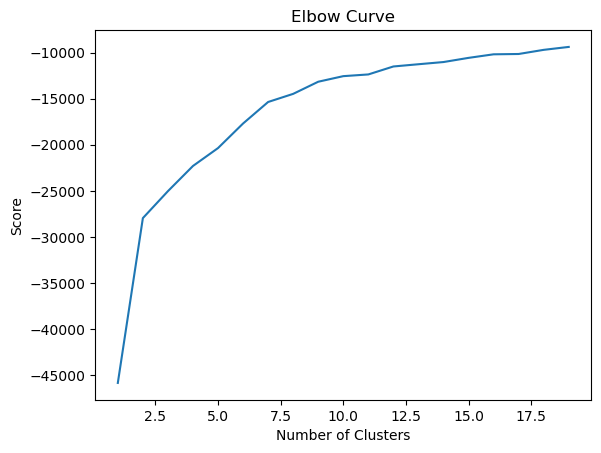

In [40]:
#Plotting elbow curve us PyLab

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Initially I looked at my data using 1-10 clusters as in the exercise, and I felt 5 was a good cut off but it was still increasing at a fair rate after 9, so I increased the potential cluster count to 20.  After doing that, I feel like 7 is the right amount.

K-Means algorithm

In [41]:
#Creating k_means object

kmeans = KMeans(n_clusters = 7)

In [42]:
#Fitting k-means object to data

kmeans.fit(lfk)

KMeans(n_clusters=7)

In [47]:
#Creating clusters column back on lf data frame

lf['clusters'] = kmeans.fit_predict(lfk)

In [49]:
#Checking column was made

lf.head()

,Unnamed: 0,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,...,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy,LifeExp Category,Economy,clusters
0,0,Turkey,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,...,78.53,4.9,4.8,7.8,0,1,76.5,High,Developing,1
1,1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,...,46.44,0.6,0.5,9.7,1,0,82.8,High,Developed,4
2,2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,...,1183.21,27.1,28.0,5.0,0,1,65.4,Middle,Developing,3
3,3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,...,0.75,5.7,5.5,7.9,0,1,67.0,Middle,Developing,1
4,4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,...,7.91,1.2,1.1,12.8,1,0,81.7,High,Developed,4


In [50]:
lf['clusters'].value_counts(dropna = False)

clusters
1    1157
4     686
0     457
5     261
6     176
2      95
3      32
Name: count, dtype: int64

Creating scatterplots to check for relationships

<Figure size 1200x800 with 0 Axes>

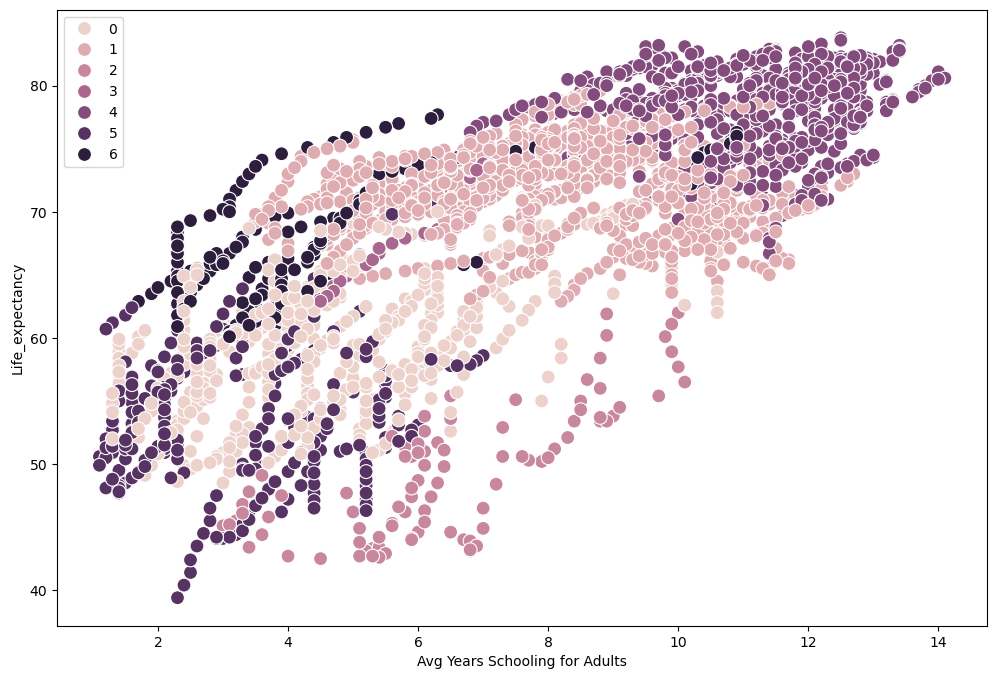

In [52]:
#Life Expectancy vs Schooling scatter

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=lf['Schooling'], y=lf['Life_expectancy'], hue=kmeans.labels_, s=100)

ax.grid(False) #Removing grid from background
plt.xlabel('Avg Years Schooling for Adults')
plt.ylabel('Life_expectancy')
plt.show()

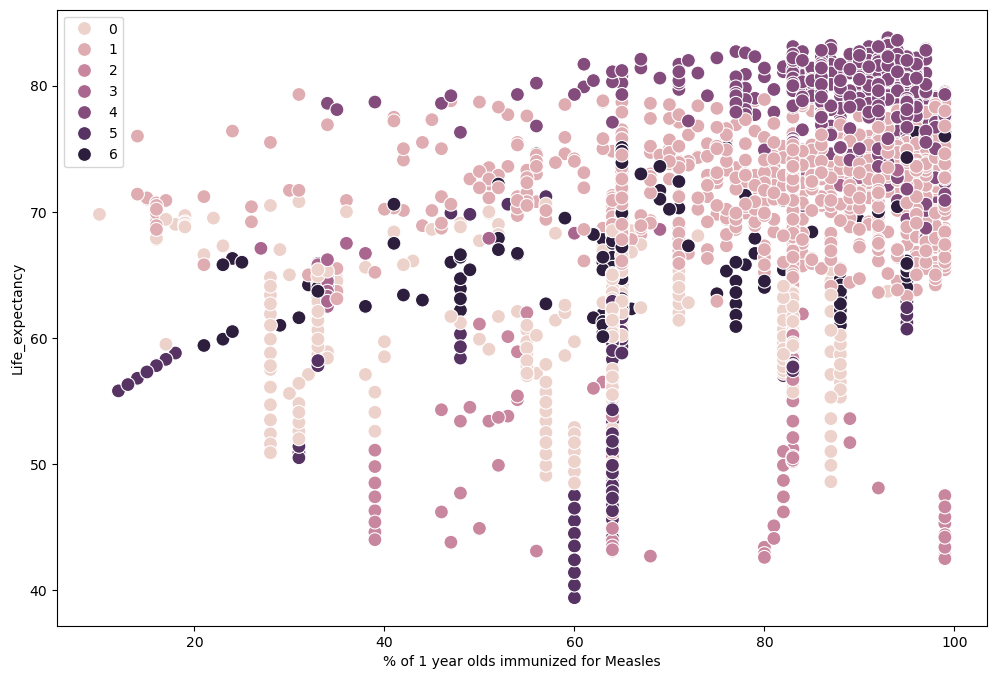

In [53]:
#Life expectancy vs measles immunizations in 1 year olds

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=lf['Measles'], y=lf['Life_expectancy'], hue=kmeans.labels_, s=100)

ax.grid(False)
plt.xlabel('% of 1 year olds immunized for Measles')
plt.ylabel('Life_expectancy')
plt.show()

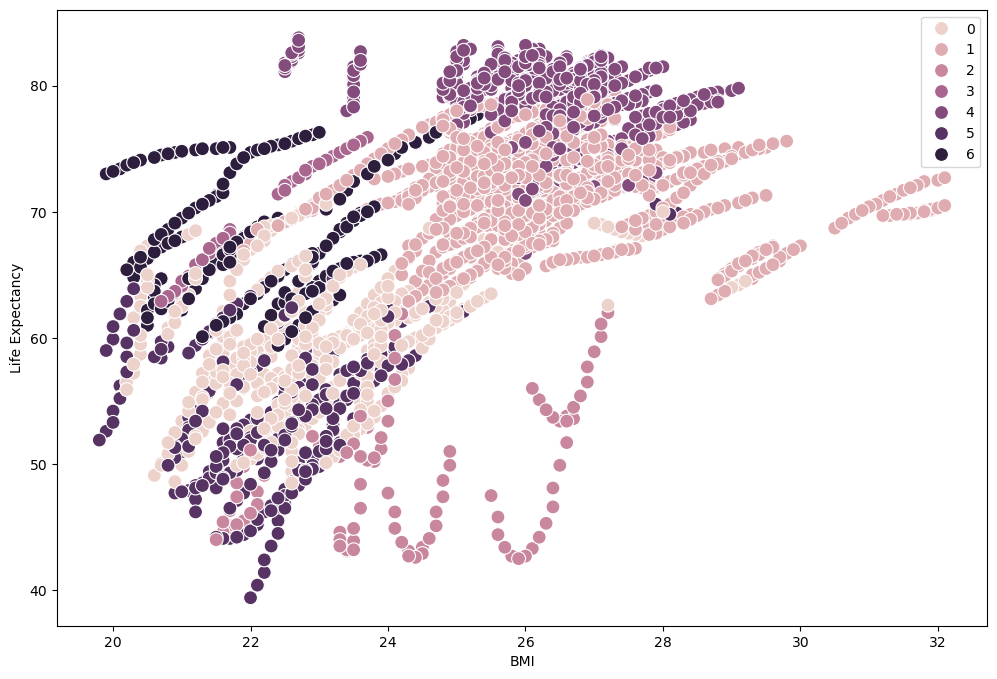

In [54]:
#Life expectancy vs BMI

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=lf['BMI'], y=lf['Life_expectancy'], hue=kmeans.labels_, s=100)

ax.grid(False)
plt.xlabel('BMI')
plt.ylabel('Life Expectancy')
plt.show()

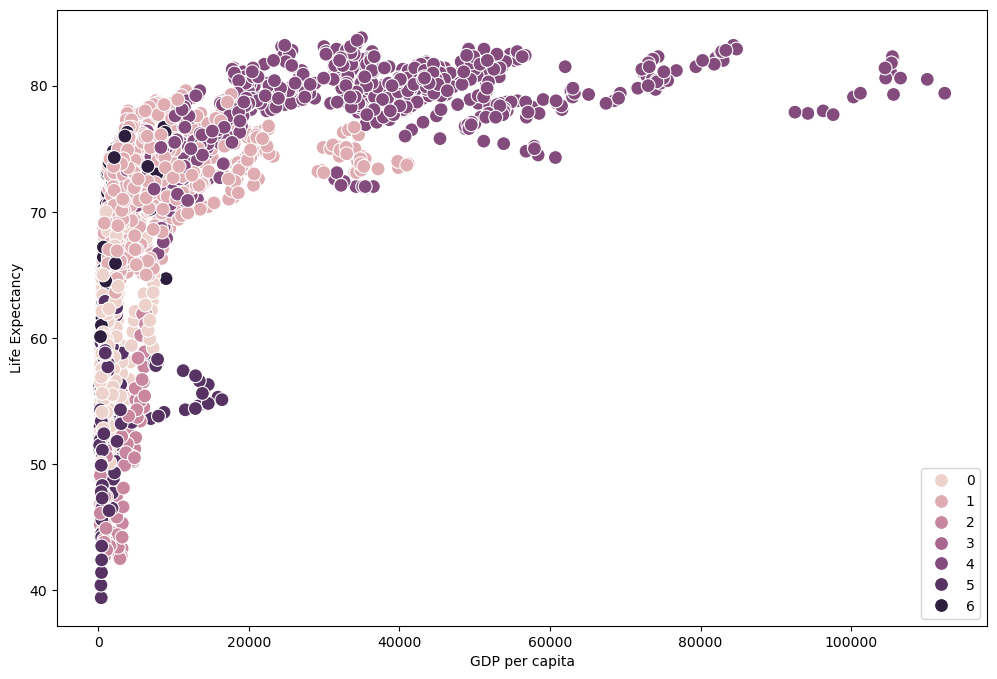

In [55]:
#Life expectancy vs GDP per capita

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=lf['GDP_per_capita'], y=lf['Life_expectancy'], hue=kmeans.labels_, s=100)

ax.grid(False)
plt.xlabel('GDP per capita')
plt.ylabel('Life Expectancy')
plt.show()

Visual analysis of scatterplots

Throughout all scatterplots, cluster 2 and 4 seem to be the most consistent.  There isn't a factor though that keeps them in distinct clusters though, which suggests a lack of an overriding factor.

In [56]:
lf.groupby('clusters').agg({'Life_expectancy':['mean', 'median'],
                            'Schooling':['mean', 'median'],
                            'Measles':['mean', 'median'],
                            'BMI':['mean', 'median'],
                            'GDP_per_capita':['mean', 'median']})

Life_expectancy         Schooling           Measles         \
                    mean median       mean median       mean median   
clusters                                                              
0              59.536105   59.6   4.602407    4.3  60.271335   64.0   
1              72.091271   72.4   8.239067    8.3  82.554019   86.0   
2              49.361053   48.7   6.492632    6.1  68.642105   64.0   
3              69.637500   70.0   6.115625    6.4  66.343750   76.5   
4              78.251312   79.0  11.217055   11.5  89.142857   91.0   
5              53.800383   53.3   3.446743    3.3  62.724138   64.0   
6              67.876136   66.7   4.633523    3.9  69.829545   65.0   

                BMI        GDP_per_capita           
               mean median           mean   median  
clusters                                            
0         22.985339  22.80    1378.004376   1088.0  
1         26.335436  26.10    6960.722558   4648.0  
2         24.383158  24.10    2827.084211   2749.0  
3         22.100000  22.05    2909.625000   1900.0  
4         26.196939  26.20   33792.597668  33992.5  
5         22.339080  22.30    1787.367816    684.0  
6         22.128977  22.05    2045.448864   1218.0

Clusters 1 and 4, have the highest life expectancies, with 4 being the highest.  They also have the highest values for schooling, measles immunizations, BMI, and GDP per capita, and by a noticeable amount as well.  What this tells me is that there's value in all of these things but that the difference doesn't manifest itself in life expectancy until reaching a certain point.  This is shown the most starkly on the GDP scatterplot in that after a value of around 10,000, the data points are all clusters 1 and 4.

In [57]:
#Exporting Data

lf.to_csv(os.path.join(path, 'Data', 'LifeExpectancyClean.csv'))